# Import Data

In [61]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_digits
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Import Diabetes 

In [62]:
diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [63]:
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.DataFrame(diabetes.target, columns=["disease_progression"])

X.head()
y.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


,disease_progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [64]:
data = pd.merge(X, y, left_index=True, right_index=True)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


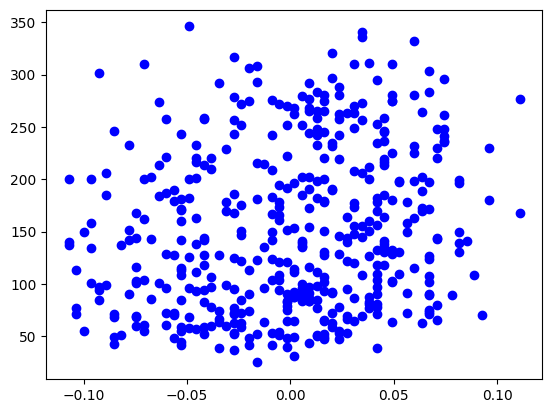

In [65]:
import matplotlib.pyplot as plt

plt.scatter(data["age"], data["disease_progression"], color="b")
plt.show()

In [66]:
data.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'disease_progression'],
      dtype='object')

## Import OLS

In [67]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

## Multiple Linear Regression Model

In [68]:
# Create formula
dependent_var = "disease_progression" # we are predicting 'mpg'
independent_var = "age + sex + bmi + bp + s1 + s2 + s3 + s4 + s5 + s6"

formula = dependent_var + " ~ " + independent_var

# Create model & train
model = ols(formula, data).fit()

# Results
print("Anova:")
print(f"{anova_lm(model)}")
print("Params:")
print(f"{model.params}")
print("Summary:")
print(f"{model.summary()}")

Anova:
             df        sum_sq        mean_sq           F        PR(>F)
age         1.0  9.252734e+04   92527.342829   31.550422  3.490058e-08
sex         1.0  2.933667e+02     293.366704    0.100034  7.519424e-01
bmi         1.0  8.269553e+05  826955.273690  281.979218  4.744010e-49
bp          1.0  1.293118e+05  129311.781305   44.093358  9.447833e-11
s1          1.0  1.791171e+03    1791.170780    0.610762  4.349301e-01
s2          1.0  5.057628e+03    5057.628085    1.724575  1.898040e-01
s3          1.0  2.373292e+05  237329.237611   80.925674  7.509047e-18
s4          1.0  1.821160e+03    1821.160324    0.620988  4.311135e-01
s5          1.0  5.885588e+04   58855.884508   20.068965  9.581554e-06
s6          1.0  3.080493e+03    3080.492964    1.050401  3.059895e-01
Residual  431.0  1.263986e+06    2932.681637         NaN           NaN
Params:
Intercept    152.133484
age          -10.009866
sex         -239.815644
bmi          519.845920
bp           324.384646
s1          -